[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - loss: 0.0124
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 6.8634e-04
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.3254e-04
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.6828e-04
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.1545e-04
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.3872e-04
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.1752e-04
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.0983e-04
Epoch 9/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.4443e-04
Epoch 10/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.4159e-04
Epoch 11/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.9231e-04
Epoch 12/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.0888e-04
Epoch 13/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.7452e-04
Epoch 14/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.1068e-04
Epoch 15/100
72

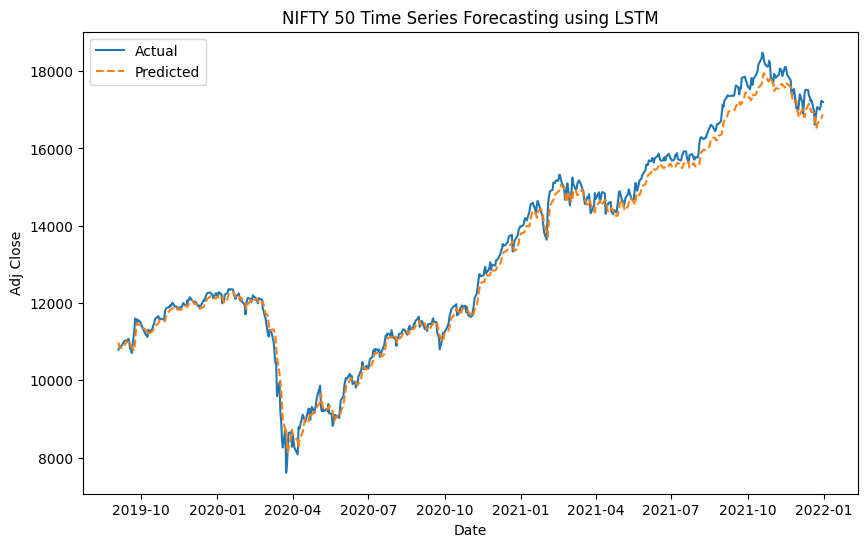

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# Download historical NIFTY 50 data using yfinance
nifty_data = yf.download("^NSEI", start='2010-01-01', end="2022-01-01")

# Check if data is downloaded correctly
if nifty_data.empty:
    raise ValueError("Failed to download data. Check ticker symbol and internet connection.")

# Extract relevant columns
nifty_data = nifty_data[['Adj Close']]

# Reset the index to make Date a column
nifty_data = nifty_data.reset_index()

# Convert "Date" column to datetime format if needed
if not pd.api.types.is_datetime64_any_dtype(nifty_data['Date']):
    nifty_data['Date'] = pd.to_datetime(nifty_data['Date'])

# Feature engineering: Adding a column for days since the start
nifty_data['Days'] = (nifty_data['Date'] - nifty_data['Date'].min()).dt.days

# Normalize the "Adj Close" prices for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
nifty_data['Adj Close'] = scaler.fit_transform(nifty_data[['Adj Close']])

# Prepare data for LSTM model (time series windowing)
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Define time step (number of previous days to use for prediction)
time_step = 60

# Create LSTM data (features and target)
X, y = create_dataset(nifty_data[['Adj Close']].values, time_step)

# Reshape input data to be [samples, time steps, features] for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predicted values and actual test values
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(nifty_data['Date'][-len(y_test):], y_test, label='Actual')
plt.plot(nifty_data['Date'][-len(y_test):], y_pred, label='Predicted', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('NIFTY 50 Time Series Forecasting using LSTM')
plt.legend()
plt.show()


### SAME CODE AS ABOVE < BUT SOME MORE PLOTTINGS

[*********************100%***********************]  1 of 1 completed

Epoch 1/100



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0179
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.4892e-04
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.1257e-04
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.1997e-04
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.6134e-04
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.8482e-04
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.2178e-04
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.1607e-04
Epoch 9/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.6231e-04
Epoch 10/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.6518e-04
Epoch 11/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.0319e-04
Epoch 12/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.3666e-04
Epoch 13/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.1947e-04
Epoch 14/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.9319e-04
Epoch 15/100
72/72 ━━━━━━━━━━━━

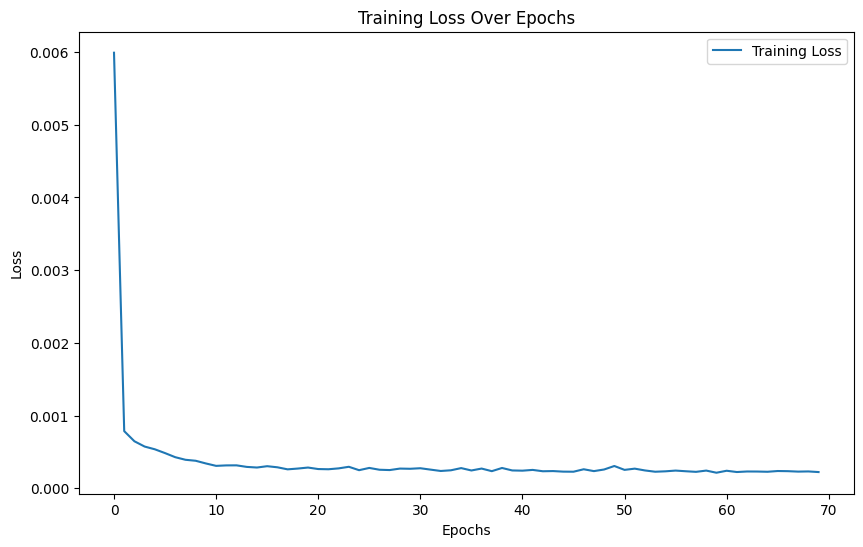

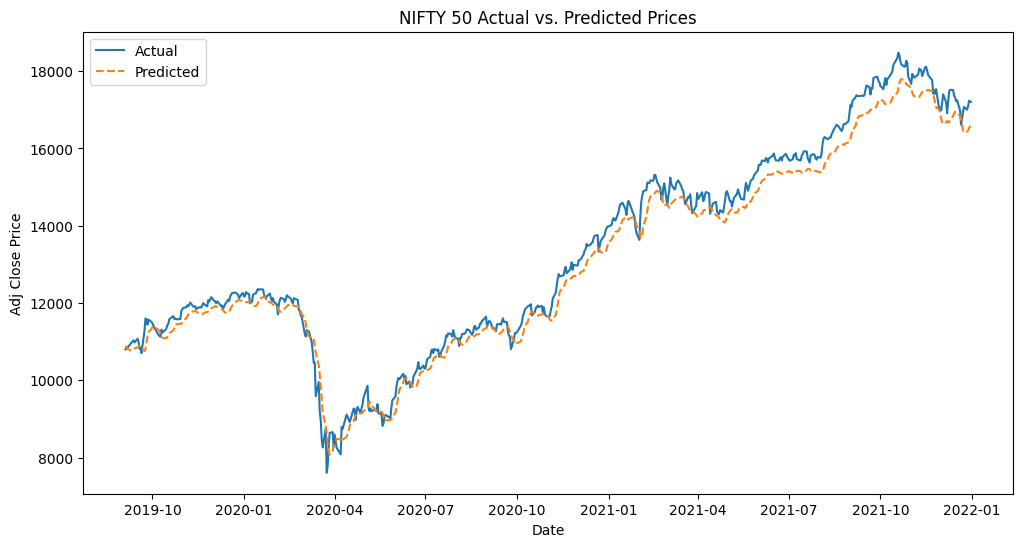

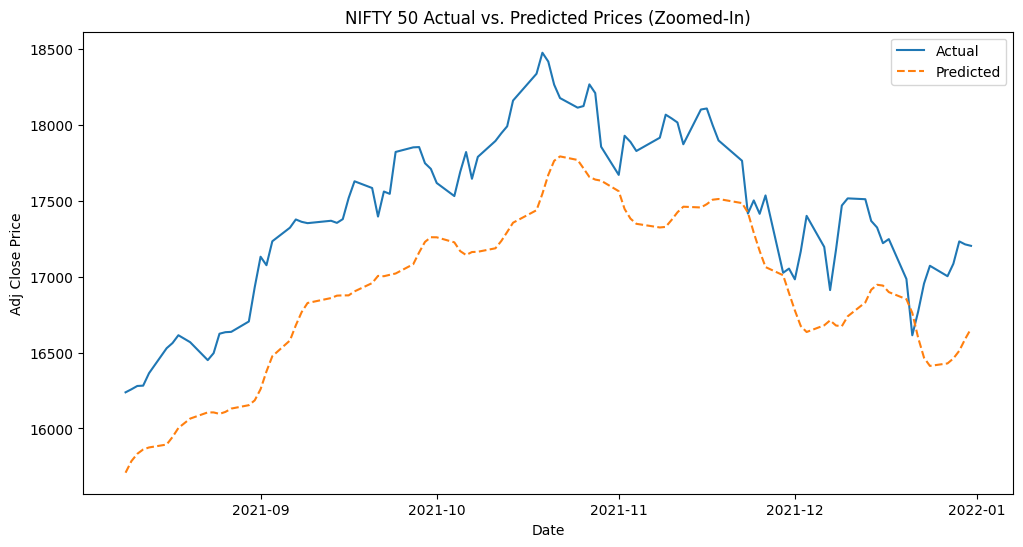

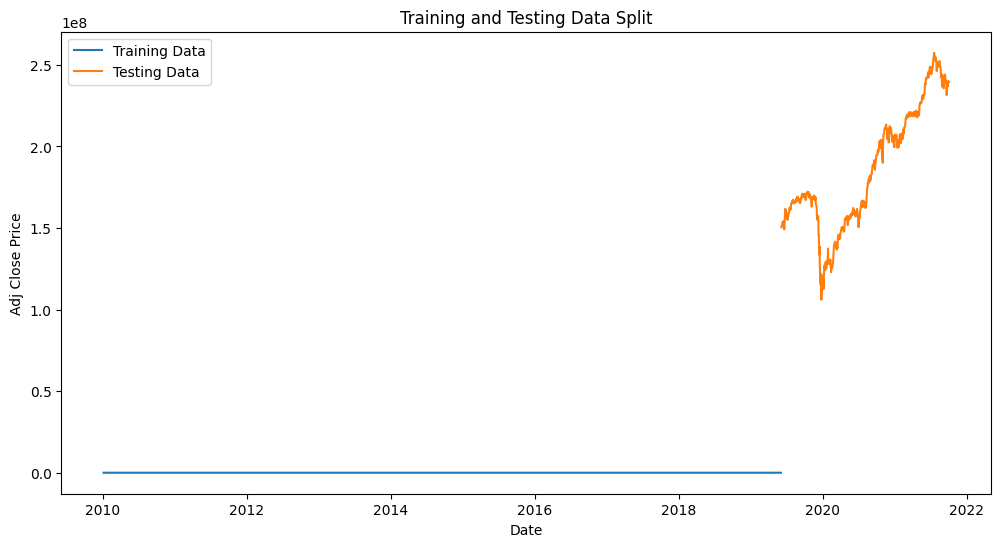

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Download historical NIFTY 50 data using yfinance
nifty_data = yf.download("^NSEI", start='2010-01-01', end="2022-01-01")

# Check if data is downloaded correctly
if nifty_data.empty:
    raise ValueError("Failed to download data. Check ticker symbol and internet connection.")

# Extract relevant columns
nifty_data = nifty_data[['Adj Close']]
nifty_data = nifty_data.reset_index()

# Convert "Date" column to datetime format if needed
nifty_data['Date'] = pd.to_datetime(nifty_data['Date'])

# Feature engineering: Adding a column for days since the start
nifty_data['Days'] = (nifty_data['Date'] - nifty_data['Date'].min()).dt.days

# Normalize the "Adj Close" prices for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
nifty_data['Adj Close'] = scaler.fit_transform(nifty_data[['Adj Close']])

# Prepare data for LSTM model (time series windowing)
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Define time step (number of previous days to use for prediction)
time_step = 60
X, y = create_dataset(nifty_data[['Adj Close']].values, time_step)

# Reshape input data to be [samples, time steps, features] for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Add early stopping callback
early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stop])

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predicted values and actual test values
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model using Mean Squared Error (MSE), RMSE, and MAE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')

# Plot training loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(nifty_data['Date'][-len(y_test):], y_test, label='Actual')
plt.plot(nifty_data['Date'][-len(y_test):], y_pred, label='Predicted', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('NIFTY 50 Actual vs. Predicted Prices')
plt.legend()
plt.show()

# Zoomed-In Plot for recent dates
plt.figure(figsize=(12, 6))
plt.plot(nifty_data['Date'][-100:], y_test[-100:], label='Actual')
plt.plot(nifty_data['Date'][-100:], y_pred[-100:], label='Predicted', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('NIFTY 50 Actual vs. Predicted Prices (Zoomed-In)')
plt.legend()
plt.show()

# Train-Test Split Visualization
plt.figure(figsize=(12, 6))
plt.plot(nifty_data['Date'][:len(X_train)], scaler.inverse_transform(y_train.reshape(-1, 1)), label='Training Data')
plt.plot(nifty_data['Date'][len(X_train):len(X_train) + len(X_test)], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Testing Data')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Training and Testing Data Split')
plt.legend()
plt.show()
